# Installing required Packages

In [3]:
!pip install torchinfo
!pip install comet_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 534.7/534.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.7/206.7 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.1/510.1 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 16.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of requests to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━

In [1]:
%pip install lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.4/562.4 kB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.6/720.6 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

# Importing required Packages

In [4]:
import os

import matplotlib.pyplot as plt

import comet_ml
import torch.nn as nn
import pytorch_lightning as pl
import torch
import torch.nn.functional as F

from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CometLogger
from pytorch_lightning import loggers
from pytorch_lightning.callbacks import ModelCheckpoint

from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
import torchvision

from torchinfo import summary

from PIL import Image
from matplotlib.pyplot import imshow

# Defining our Model

In [5]:
class Model(pl.LightningModule):
  def __init__(self, number_of_filters, learning_rate):
    super().__init__()

    self.save_hyperparameters()

    self.learning_rate = learning_rate

    self.val_correct_counter = 0
    self.val_total_counter = 0
    self.val_batch_counter = 0

    self.loss = nn.NLLLoss()

    self.hidden0 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=number_of_filters, kernel_size=4),
        nn.LeakyReLU(0.2)
    )

    self.hidden1 = nn.Sequential(
        nn.Conv2d(number_of_filters, number_of_filters * 2, kernel_size=4),
        nn.LeakyReLU(0.2),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.hidden2 = nn.Sequential(
        nn.Conv2d(number_of_filters * 2, number_of_filters * 4, kernel_size=4),
        nn.LeakyReLU(0.2),
    )

    self.hidden3 = nn.Sequential(
        nn.Conv2d(number_of_filters * 4, number_of_filters * 8, kernel_size=4),
        nn.LeakyReLU(0.2),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten()
    )

    self.hidden4 = nn.Sequential(
        nn.Linear(number_of_filters * 8 * 4, 100),
        nn.LeakyReLU(0.2),
    )

    self.hidden5 = nn.Sequential(
        nn.Linear(100, 10),
        nn.LogSoftmax()
    )

  def forward(self, x):
        #print(x.shape)
        x = self.hidden0(x)
        #print(x.shape)
        x = self.hidden1(x)
        #print(x.shape)
        x = self.hidden2(x)
        #print(x.shape)
        x = self.hidden3(x)
        #print(x.shape)
        x = self.hidden4(x)
        #print(x.shape)
        x = self.hidden5(x)

        return x

  def training_step(self, batch, batch_idx):
      x, y = batch

      predicted = self.forward(x)
      loss = self.loss(predicted, y)

      self.logger.log_metrics({"train_loss": loss}, step=batch_idx)
      return loss

  def validation_step(self, batch, batch_idx):
      x, y = batch

      predicted = self.forward(x)
      loss = self.loss(predicted, y)

      # to calculate the test accuracy
      self.val_correct_counter += int((torch.argmax(predicted, 1).flatten() == y).sum())
      self.val_total_counter += y.size(0)

      self.logger.log_metrics({"val_loss": loss}, step=batch_idx)
      return loss

  def on_validation_epoch_end(self):
      # outputs is an array with what you returned in validation_step for each batch
      # outputs = [{'loss': batch_0_loss}, {'loss': batch_1_loss}, ..., {'loss': batch_n_loss}]

      avg_acc = 100 * self.val_correct_counter / self.val_total_counter

      self.val_correct_counter = 0
      self.val_total_counter = 0

      self.logger.log_metrics({"val_acc": avg_acc}, step=self.val_batch_counter)

      self.val_batch_counter += 1

  def configure_optimizers(self):
      return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

# Model Initalisation and Hyperparameters


In [6]:
# Hyperparameters
hparam = {
    "learning_rate": 0.001,
    "number_of_filters": 16, # Needs to be 16 else switch linear Layer
    "batch_size": 128 * 6,
    "optimizer": "Adam",
    "seed": 42
}


# Parameters for logging
experiment_name = "MAIN_CNN_21_06"
checkpoint_folder = "./" + experiment_name + "_checkpoints/"
dataset_name = "MNIST"
tags = ["CNN"]

In [7]:
# Init Model
model = Model(hparam["number_of_filters"], hparam["learning_rate"])

## The size of our Model

In [ ]:
print(summary(model, input_size=(1, 1, 28, 28)))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [1, 10]                   --
├─Sequential: 1-1                        [1, 16, 25, 25]           --
│    └─Conv2d: 2-1                       [1, 16, 25, 25]           272
│    └─LeakyReLU: 2-2                    [1, 16, 25, 25]           --
├─Sequential: 1-2                        [1, 32, 11, 11]           --
│    └─Conv2d: 2-3                       [1, 32, 22, 22]           8,224
│    └─LeakyReLU: 2-4                    [1, 32, 22, 22]           --
│    └─MaxPool2d: 2-5                    [1, 32, 11, 11]           --
├─Sequential: 1-3                        [1, 64, 8, 8]             --
│    └─Conv2d: 2-6                       [1, 64, 8, 8]             32,832
│    └─LeakyReLU: 2-7                    [1, 64, 8, 8]             --
├─Sequential: 1-4                        [1, 512]                  --
│    └─Conv2d: 2-8                       [1, 128, 5, 5]            131,200
│ 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


# Loading MNIST Dataset

In [ ]:
compose = transforms.Compose([
          transforms.ToTensor(),
          transforms.Normalize((0.5,), (0.5,))
      ])

In [ ]:
# Load Data
train_ds = MNIST(
    "data", train=True, download=True, transform=compose
)

train_loader = DataLoader(train_ds,  shuffle=True, batch_size=hparam["batch_size"])

eval_ds = MNIST(
    "data", train=False, download=True, transform=compose
)

eval_loader = DataLoader(train_ds, batch_size=hparam["batch_size"])

# Initialize our Logger

I use as logger comet.ml, if you want to use this logger, create a text file with the name "api_key.txt" in the same folder and enter your comet.ml api key.
If you do not want to use this logger switch the logger where you start training the model.

In [ ]:
# get the api key
with open("api_key.txt", "r") as f:
    f_api_key = f.read()

# set global seed
torch.manual_seed(hparam["seed"])

# init logger
comet_logger = loggers.CometLogger(
    api_key= f_api_key,
    project_name="mnist-proseminar",
    experiment_name=experiment_name,
)


INFO:pytorch_lightning.loggers.comet:CometLogger will be initialized in online mode


In [ ]:
#logging
comet_logger.experiment.set_model_graph(str(model))
comet_logger.experiment.add_tags(tags=tags)
comet_logger.experiment.log_dataset_info(name=dataset_name)
comet_logger.experiment.log_parameter(name="learning_rate", value=hparam["learning_rate"])
comet_logger.experiment.log_parameter(name="batch_size", value=hparam["batch_size"])
comet_logger.experiment.log_parameter(name="ndf", value=hparam["number_of_filters"])
comet_logger.experiment.log_parameter(name="seed", value=hparam["seed"])

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/luposx/mnist-proseminar/09dd4b2b610849049034aef1430e2768



# Training the NN

In [ ]:
model.train()

# Initalize the trainer
checkpoint_callback = ModelCheckpoint(dirpath=checkpoint_folder)
trainer = pl.Trainer(# fast_dev_run=True,
                      callbacks=checkpoint_callback,
                      accelerator="gpu",
                      max_epochs=5,
                      logger=comet_logger)
trainer.fit(model, train_loader, eval_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type       | Params
---------------------------------------
0 | loss    | NLLLoss    | 0     
1 | hidden0 | Sequential | 272   
2 | hidden1 | Sequential | 8.2 K 
3 | hidden2 | Sequential | 32.8 K
4 | hidden3 | Sequential | 131 K 
5 | hidden4 | Sequential | 51.3 K
6 | hidden5 | Sequential | 1.0 K 
---------------------------------------
224 K     Trainable params
0         Non-trainable params
224 K     Total params
0.899     Total estimated model params size (MB)
COMET WARNING: Set model graph ignored; already called. Call wi

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/luposx/mnist-proseminar/09dd4b2b610849049034aef1430e2768
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [35]        : (0.025587623938918114, 1.1600921154022217)
COMET INFO:     train_loss [395] : (0.011664967983961105, 2.305577278137207)
COMET INFO:     val_acc [6]      : (7.8125, 98.96166666666667)
COMET INFO:     val_loss [397]   : (0.005283661186695099, 2.30991530418396)
COMET INFO:   Others:
COMET INFO:     Name         : MAIN_CNN_21_06
COMET INFO:     dataset_info : MNIST
COMET INFO:   Parameters:
COMET INFO:     batch_

In [ ]:
# log checkpoints, make sure we log everything before we shut down the logger
comet_logger.experiment.log_asset_folder(folder=checkpoint_folder)
comet_logger.experiment.end()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/luposx/mnist-proseminar/09dd4b2b610849049034aef1430e2768

COMET WARNING: The default value for the log_file_name parameter will change from False to True in a future version. Explicitly pass log_file_name=True or log_file_name=False to disable this warning
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml ExistingExperiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https

# Exporting the Model as onx file


In [8]:
!pip install onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 70.5 MB/s eta 0:00:00


In [10]:
torch.onnx.export(model, torch.rand(1, 1, 28, 28), 'model.onnx', input_names=["Input Image"], output_names=["Image Class Labels"])

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1501: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return forward_call(*args, **kwargs)


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



# Inference of the Model

In [ ]:
figure = plt.figure(figsize=(8, 8))
data = []
for i in range(1, 5):
    sample_idx = torch.randint(len(train_ds), size=(1,)).item()
    img, label = train_ds[sample_idx]
    data.append(img)

# create grid of images
img_grid = torchvision.utils.make_grid(data)

# show images
imshow(img_grid.permute(1, 2, 0), cmap='Greys')

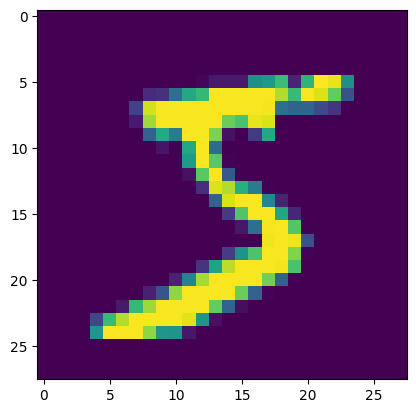

In [ ]:
data = next(iter(train_ds))[0]
plt.imshow(data.permute(1, 2, 0), cmap='Greys')

In [ ]:
print(data.size())
# We need one extra dimesnion to emulate batch size.
data = data.view(1, 1, 28, 28)
print(data.size())

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])


In [ ]:
model = Model.load_from_checkpoint(checkpoint_folder + "/epoch=4-step=395.ckpt")
model.eval()

with torch.no_grad():
   y_hat = model(data.cuda())

print("Results for Inference")
print("---------------------------")
print(" ")
print("Probabilities for Predicted-Labels: ", y_hat)
print(" ")
print("Predicted Label: ", y_hat.argmax())

Results for Inference
---------------------------
 
Probabilities for Predicted-Labels:  tensor([[-2.1434e+01, -1.6651e+01, -2.0672e+01, -5.2847e+00, -2.3566e+01,
         -5.0846e-03, -2.1610e+01, -2.1795e+01, -1.4039e+01, -1.3095e+01]],
       device='cuda:0')
 
Predicted Label:  tensor(5, device='cuda:0')
